In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Load datasets
train = pd.read_csv("C:\\Users\\pc\\Downloads\\code soft data\\archive\\fraudTrain.csv")
test = pd.read_csv("C:\\Users\\pc\\Downloads\\code soft data\\archive\\fraudTest.csv")



In [3]:
# Combine train and test datasets
data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [4]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


In [5]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [6]:
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [8]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

In [9]:
label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [10]:
train[col] = le.fit_transform(train[col])
label_encoders[col] = le

In [11]:
test[col] = le.fit_transform(test[col])
label_encoders[col] = le

In [12]:
# Convert date columns to datetime and extract relevant features
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

In [13]:
data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

In [14]:
data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [15]:
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

In [16]:
train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

In [17]:
train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day


In [18]:
train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [19]:
test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

In [20]:
test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day
test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [21]:
# Drop unnecessary columns
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)


In [22]:
print(train.shape)
print(test.shape)
print(data.shape)


(1296675, 23)
(555719, 23)
(1852394, 23)


In [23]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  36.011293  -82.048315         0   
1  99160  48.8878 -118.2105  ...  49.159047 -118.186462         0   
2  83252  42.1808 -112

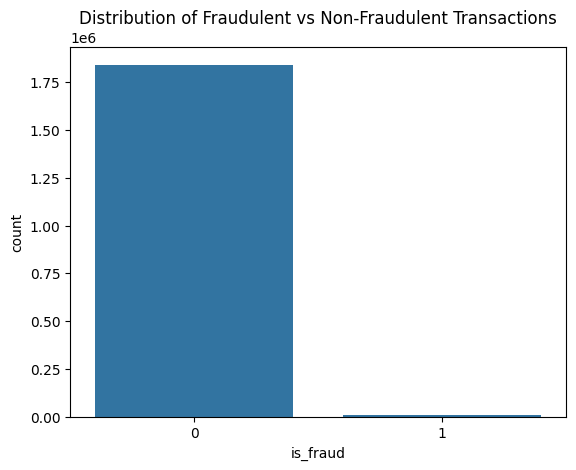

In [24]:
# Visualize the distribution of fraudulent vs non-fraudulent transactions
sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [25]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

555719
0


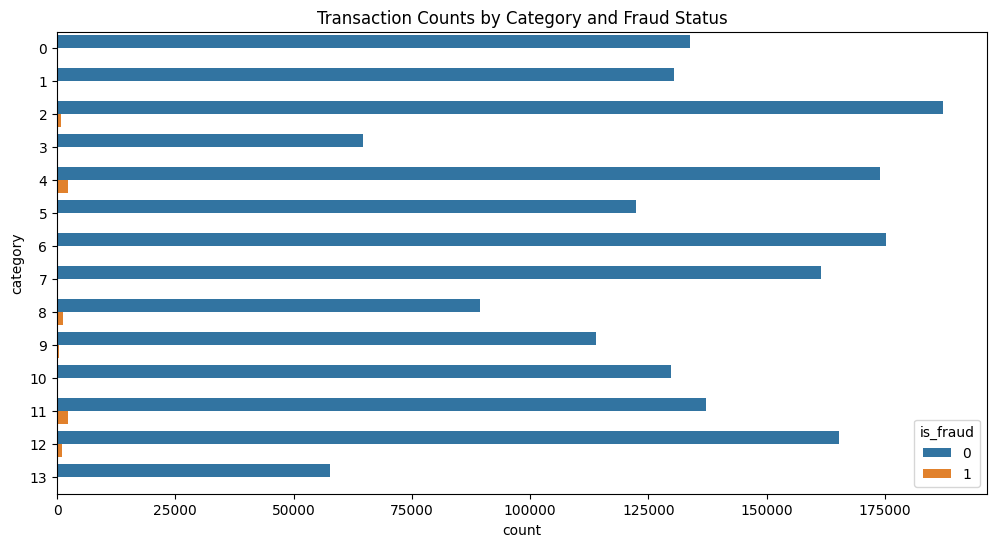

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()


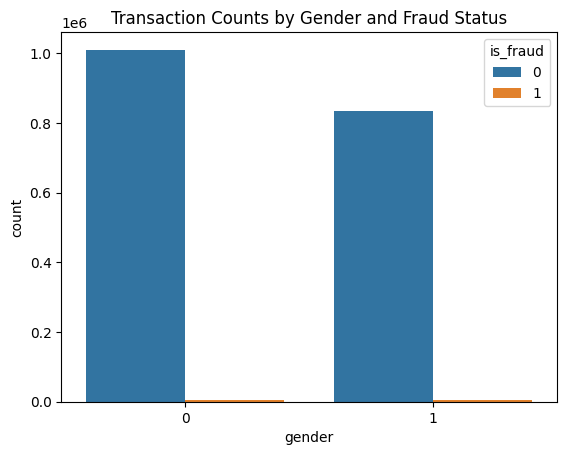

In [27]:
# The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

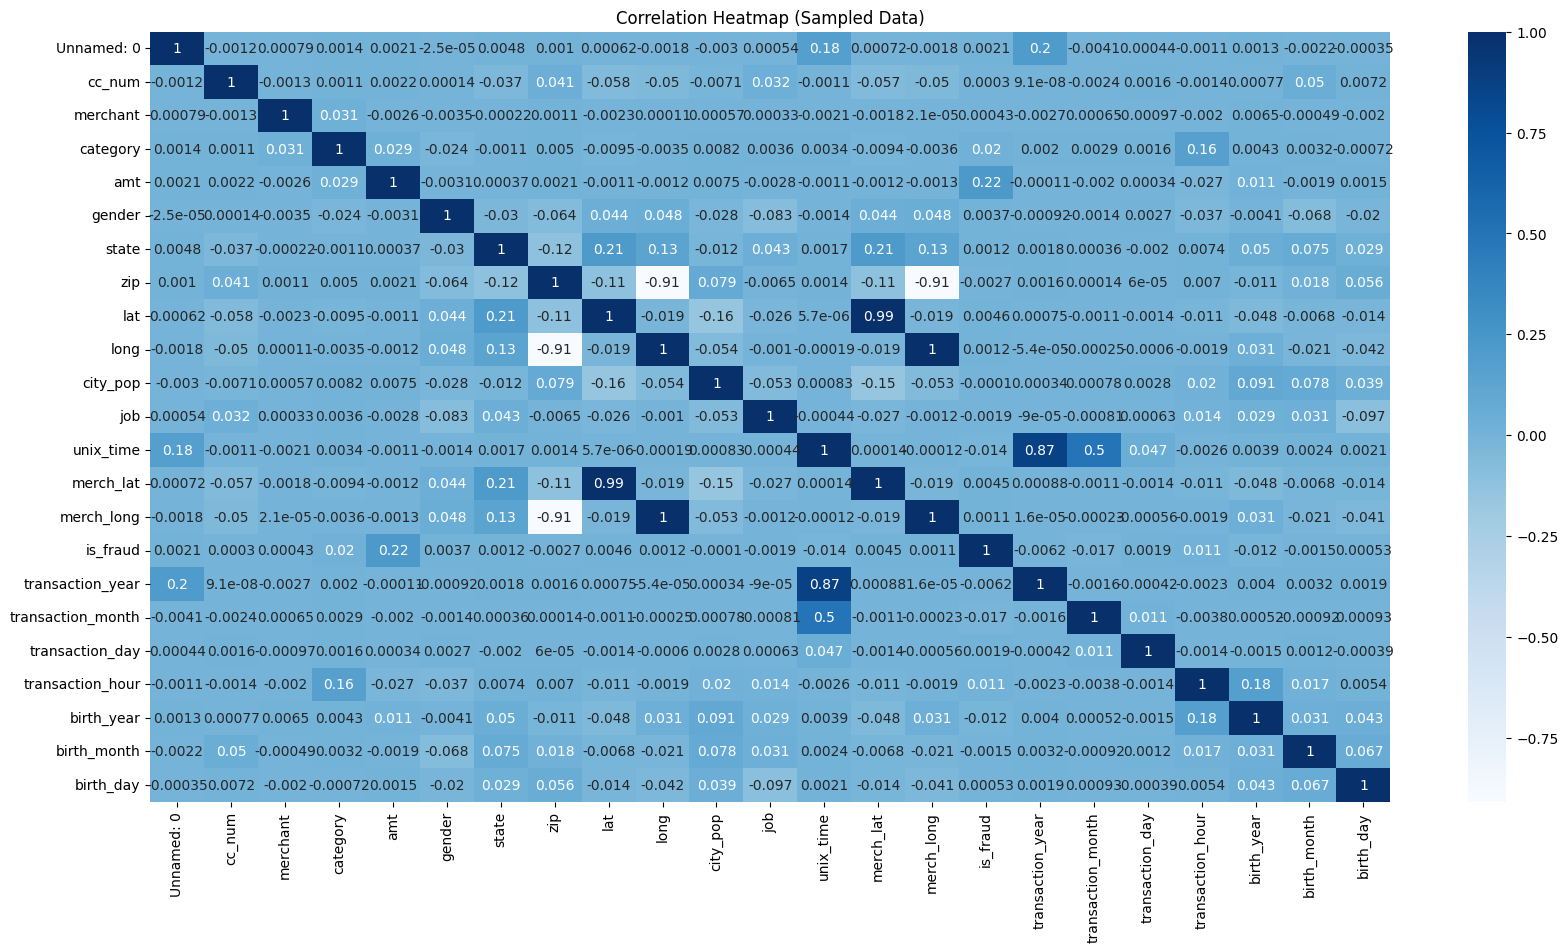

In [28]:
# Correlation heatmap using a larger sample of the data for clearer output
sampled_data = data.sample(frac=0.2, random_state=42)  # Increasing the sample fraction to 20%
plt.figure(figsize=(20, 10))
sns.heatmap(sampled_data.corr(), annot=True, cmap='Blues')  # Enable annotations for better clarity
plt.title('Correlation Heatmap (Sampled Data)')
plt.show()


In [29]:
# Prepare the data for modeling
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=0.1, random_state=42), 
                                                    y.sample(frac=0.1, random_state=42), 
                                                    test_size=0.2, random_state=42)


In [31]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Results
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     36854
           1       0.00      0.00      0.00       194

    accuracy                           0.99     37048
   macro avg       0.50      0.50      0.50     37048
weighted avg       0.99      0.99      0.99     37048

[[36854     0]
 [  194     0]]
Accuracy: 0.9947635499892032


c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [32]:
# Decision Tree Classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Classifier Results")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Classifier Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36854
           1       0.66      0.74      0.69       194

    accuracy                           1.00     37048
   macro avg       0.83      0.87      0.85     37048
weighted avg       1.00      1.00      1.00     37048

[[36779    75]
 [   51   143]]
Accuracy: 0.9965990066940186


In [33]:
# Random Forest Classifier with reduced number of trees and sample size
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Results")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36854
           1       0.94      0.46      0.62       194

    accuracy                           1.00     37048
   macro avg       0.97      0.73      0.81     37048
weighted avg       1.00      1.00      1.00     37048

[[36848     6]
 [  104    90]]
Accuracy: 0.9970308788598575


In [34]:
# Gradient Boosting Classifier with reduced number of trees and sample size
gb_model = GradientBoostingClassifier(n_estimators=30, max_depth=3, subsample=0.8, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Classifier Results")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36854
           1       0.83      0.30      0.44       194

    accuracy                           1.00     37048
   macro avg       0.91      0.65      0.72     37048
weighted avg       1.00      1.00      1.00     37048

[[36842    12]
 [  136    58]]
Accuracy: 0.99600518246599
